In [17]:
# prompt: import important libriaries for machine learning with tensorflow

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 58.3MB/s]


In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, calculate_results

--2024-03-15 21:31:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-15 21:31:20 (72.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
! wget https://raw.githubusercontent.com/jul1998/tensorflow_projects/main/scripts_for_tensorflow.py
from scripts_for_tensorflow import *

--2024-03-15 21:31:20--  https://raw.githubusercontent.com/jul1998/tensorflow_projects/main/scripts_for_tensorflow.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9458 (9.2K) [text/plain]
Saving to: ‘scripts_for_tensorflow.py’

scripts_for_tensorf 100%[===================>]   9.24K  --.-KB/s    in 0s      

2024-03-15 21:31:20 (77.4 MB/s) - ‘scripts_for_tensorflow.py’ saved [9458/9458]



In [6]:
unzip_data('/content/mobile-price-classification.zip')

In [7]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
check_df(df_train)

--------------------------------------------------------------------------------
DataFrame Shape: (2000, 21)
--------------------------------------------------------------------------------
Data types:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
--------------------------------------------------------------------------------
Head 5:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1         

In [11]:
num_attribs, cat_attribs = get_columns(df_train)
num_attribs, cat_attribs

(['battery_power',
  'blue',
  'clock_speed',
  'dual_sim',
  'fc',
  'four_g',
  'int_memory',
  'm_dep',
  'mobile_wt',
  'n_cores',
  'pc',
  'px_height',
  'px_width',
  'ram',
  'sc_h',
  'sc_w',
  'talk_time',
  'three_g',
  'touch_screen',
  'wifi',
  'price_range'],
 [])

ValueError: num must be an integer with 1 <= num <= 36, not 37

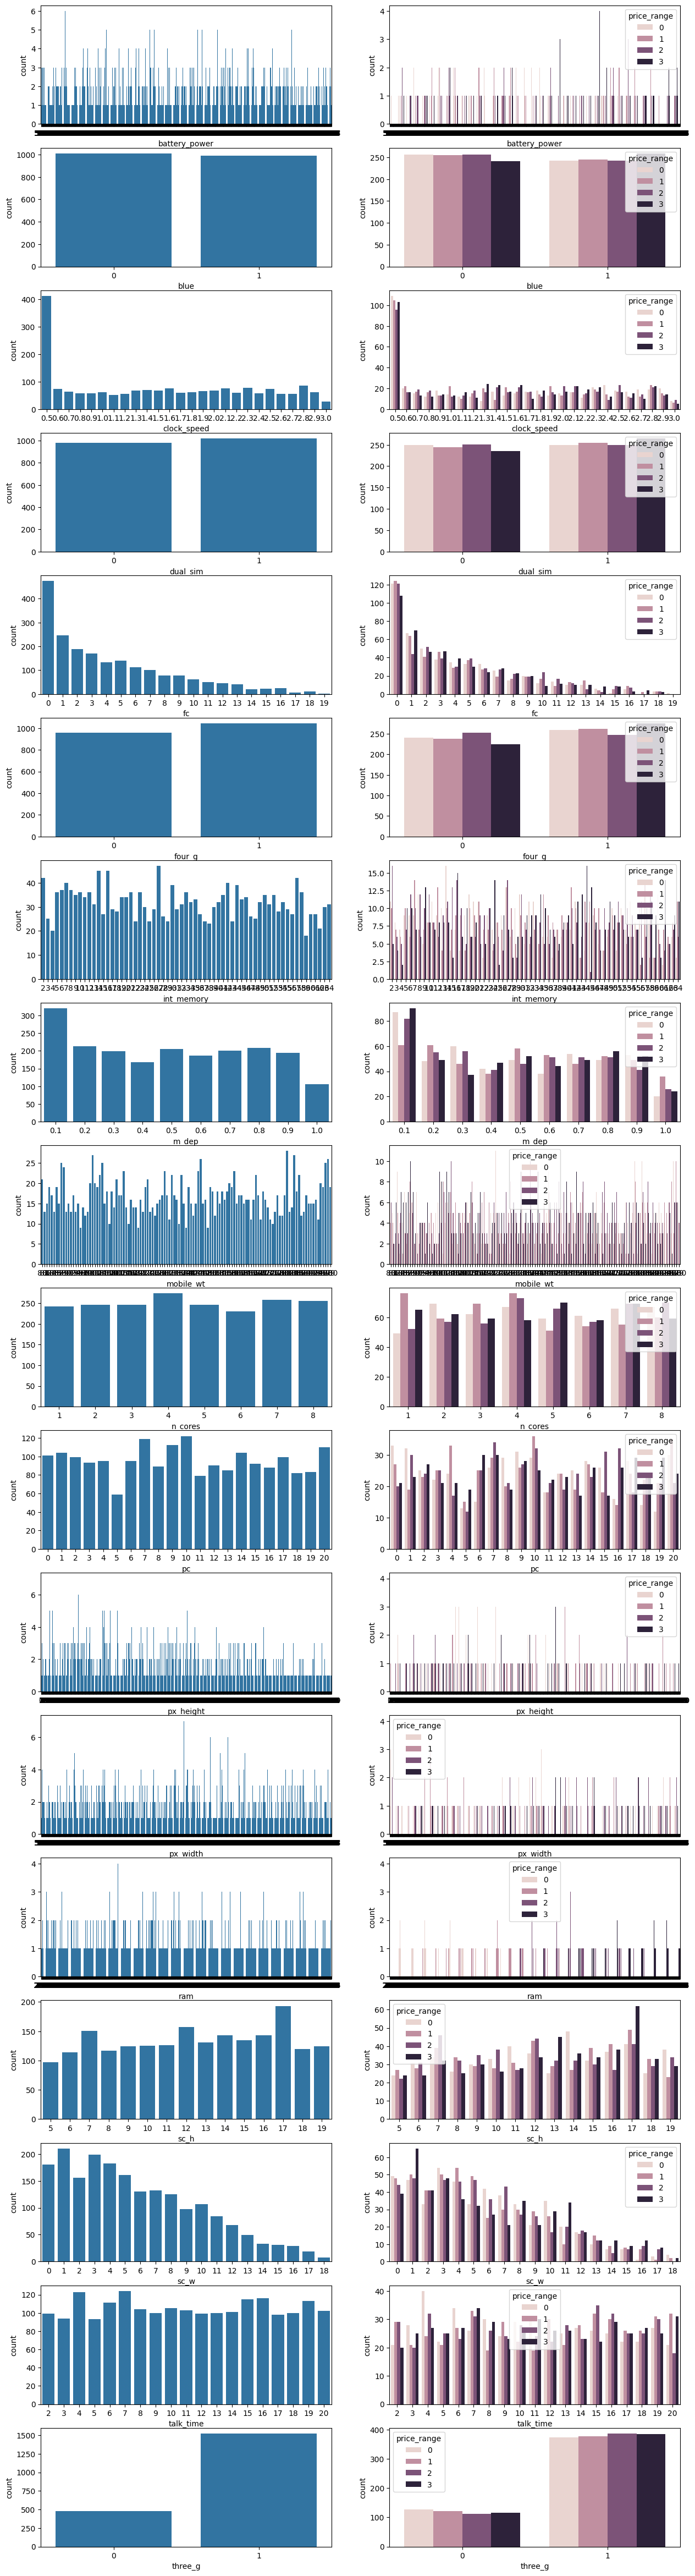

In [12]:
plt.figure(figsize=(15, 60))
for idx, feature in enumerate(num_attribs):
  plt.subplot(18, 2, idx *2+1)
  sns.countplot(x=feature, data=df_train)
  plt.subplot(18, 2, idx*2+2)
  sns.countplot(x=feature, data=df_train, hue='price_range')


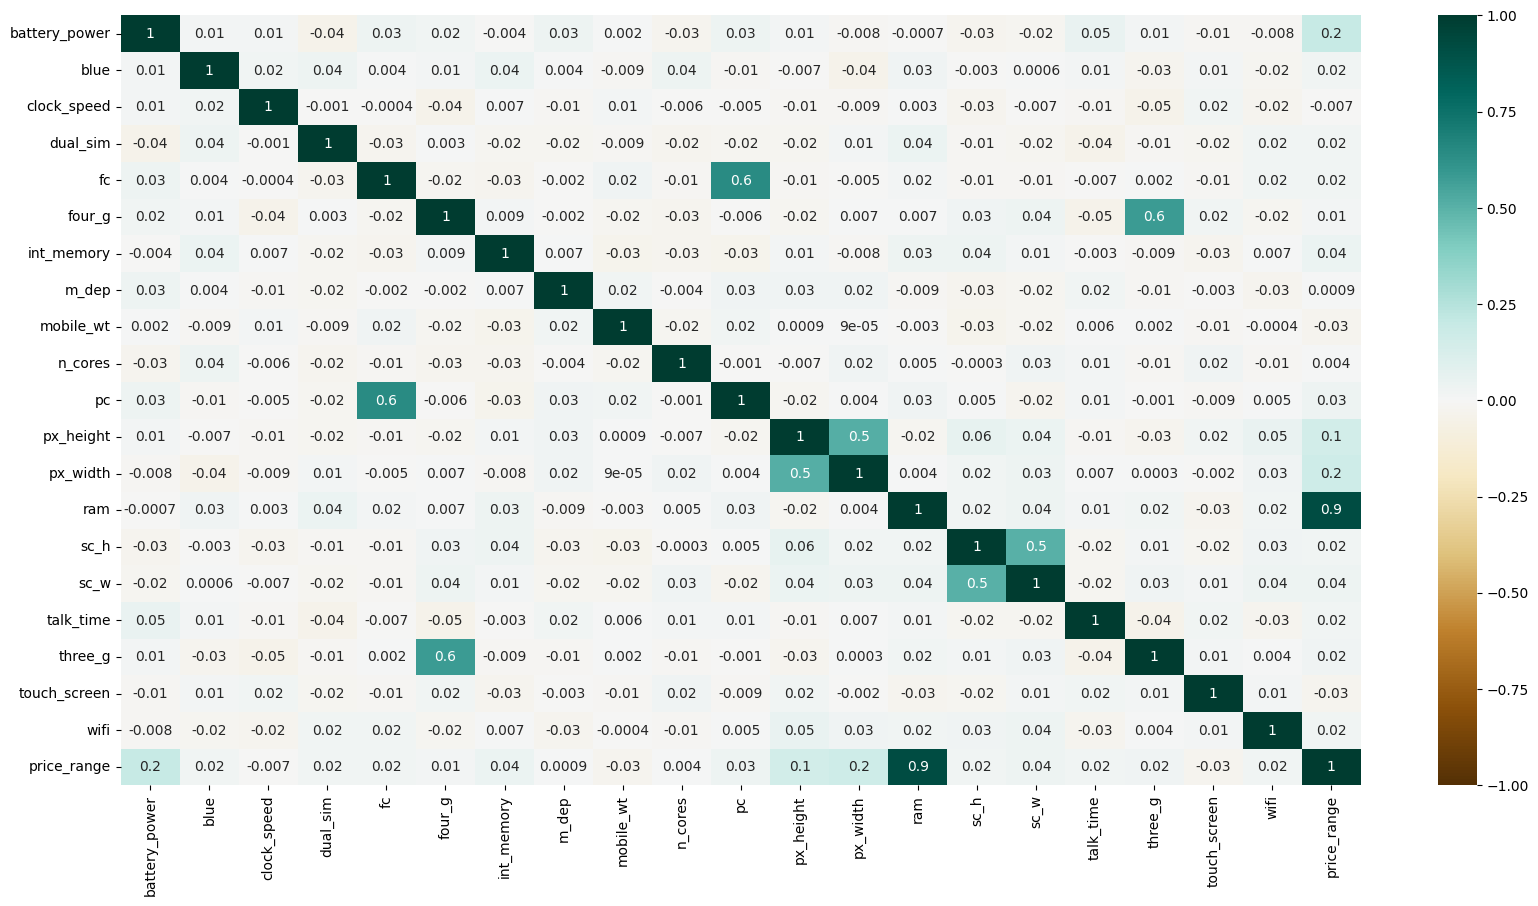

In [13]:
# prompt: create a correlation plot between features. This have big dimenssions

plt.figure(figsize=(20, 10))
sns.heatmap(df_train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, cmap='BrBG')
plt.show()


## Scaling and encoding

In [59]:
df_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [60]:
# convert to numpy arrays and split features from labels
x = df_train.drop('price_range', axis=1).values
x_predict = df_test.drop('id', axis=1).values
y = df_train['price_range'].values

In [61]:
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

In [62]:
# OneHot Encoding for labels
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [26]:
# prompt: create a tf model with l1 and l2 regulators

model_l1_l2 = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
  tf.keras.layers.Dense(4, activation='softmax')
])
model_l1_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
# prompt: create a early stopping callback with patience of 50

early_stopping = tf.keras.callbacks.EarlyStopping(patience=50)


In [ ]:
# prompt: fit model

history_l1_l2 = model_l1_l2.fit(
  x_train,
  y_train,
  epochs=500,
  validation_split=0.2,
  callbacks=[early_stopping]
)


In [30]:
model_l1_l2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.9000


[0.35604503750801086, 0.8999999761581421]

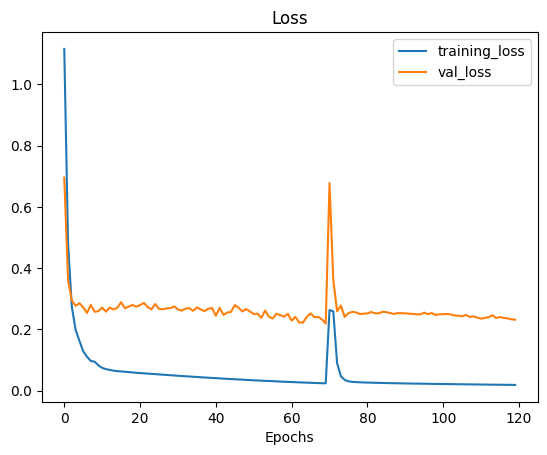

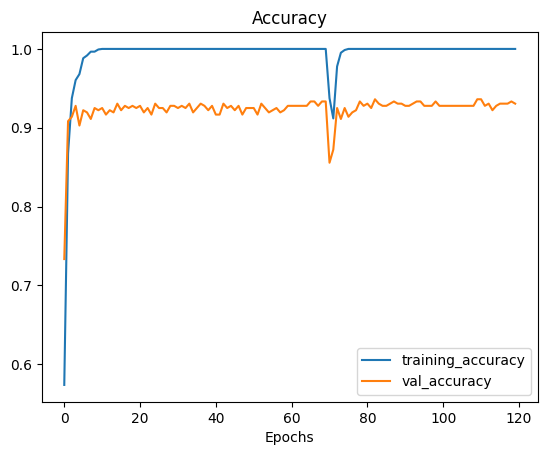

In [31]:
plot_loss_curves(history_l1_l2)

Epoch 1/500
45/45 [==============================] - 1s 7ms/step - loss: 1.1229 - accuracy: 0.5354 - val_loss: 0.6539 - val_accuracy: 0.8222
Epoch 2/500
45/45 [==============================] - 0s 5ms/step - loss: 0.4100 - accuracy: 0.8875 - val_loss: 0.2562 - val_accuracy: 0.9111
Epoch 3/500
45/45 [==============================] - 0s 5ms/step - loss: 0.2008 - accuracy: 0.9347 - val_loss: 0.2132 - val_accuracy: 0.9056
Epoch 4/500
45/45 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.9611 - val_loss: 0.2163 - val_accuracy: 0.9111
Epoch 5/500
45/45 [==============================] - 0s 4ms/step - loss: 0.0924 - accuracy: 0.9729 - val_loss: 0.2095 - val_accuracy: 0.9028
Epoch 6/500
45/45 [==============================] - 0s 4ms/step - loss: 0.0661 - accuracy: 0.9840 - val_loss: 0.2159 - val_accuracy: 0.9111
Epoch 7/500
45/45 [==============================] - 0s 5ms/step - loss: 0.0475 - accuracy: 0.9917 - val_loss: 0.2129 - val_accuracy: 0.9222
Epoch 8/500
4

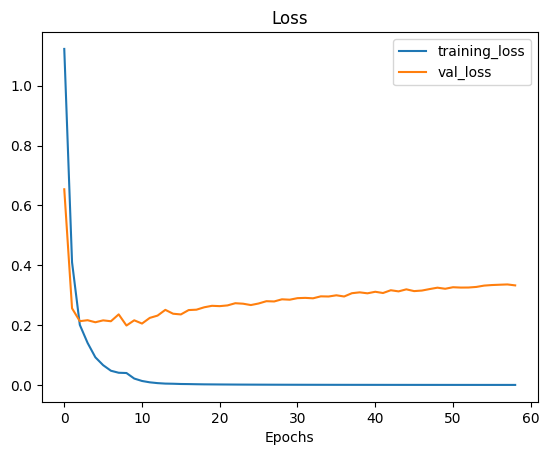

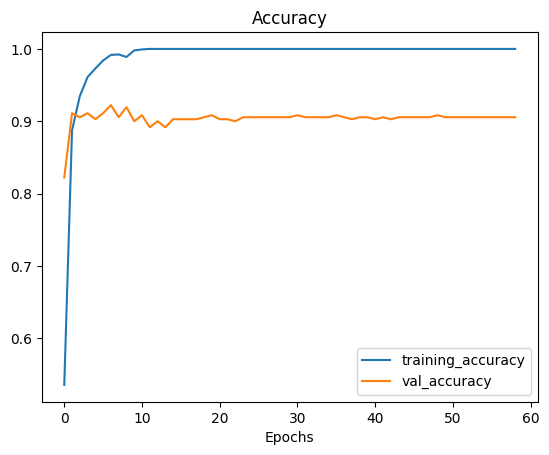

In [32]:
# prompt: create a second model same as model 1 but without regulators

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = tf.keras.callbacks.EarlyStopping(patience=50)


history_2 = model_2.fit(
  x_train,
  y_train,
  epochs=500,
  validation_split=0.2,
  callbacks=[early_stopping]
)

model_2.evaluate(x_test, y_test)
plot_loss_curves(history_2)


In [48]:
# prompt: generate predictions for the first model and use argmax

predictions_model = np.argmax(model_l1_l2.predict(x_test), axis=1)
predictions_model
len(predictions_model), len(y_test)

7/7 [==============================] - 0s 2ms/step


(200, 200)

In [41]:
y_predict = model_l1_l2.predict(x_test)

predictions = list()
for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 2ms/step


In [44]:
len(test), len(predictions)

(200, 200)

In [52]:
calculate_results(test, predictions_model)

{'accuracy': 90.0,
 'precision': 0.904682854335544,
 'recall': 0.9,
 'f1': 0.8997075638331173}